In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = r"C:\Users\HCM-LA129\Desktop\DA10\Week 7\Top_200_Movies_Dataset_2023.csv"

df = pd.read_csv(file_path)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [2]:
df.head()

,Rank,Title,Theaters,Total Gross,Release Date,Distributor
0,1,Barbie,"4,337","$594,254,460",2023-07-21 00:00:00,Warner Bros.
1,2,The Super Mario Bros. Movie,"4,371","$574,759,600",2023-04-05 00:00:00,Universal Pictures
2,3,Spider-Man: Across the Spider-Verse,"4,332","$381,178,195",2023-06-02 00:00:00,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,"4,450","$358,995,815",2023-05-05 00:00:00,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,"3,761","$300,144,670",2023-07-21 00:00:00,Universal Pictures


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          200 non-null    int64 
 1   Title         200 non-null    object
 2   Theaters      200 non-null    object
 3   Total Gross   200 non-null    object
 4   Release Date  200 non-null    object
 5   Distributor   200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


Text(0.5, 1.0, 'Ranking Distributors')

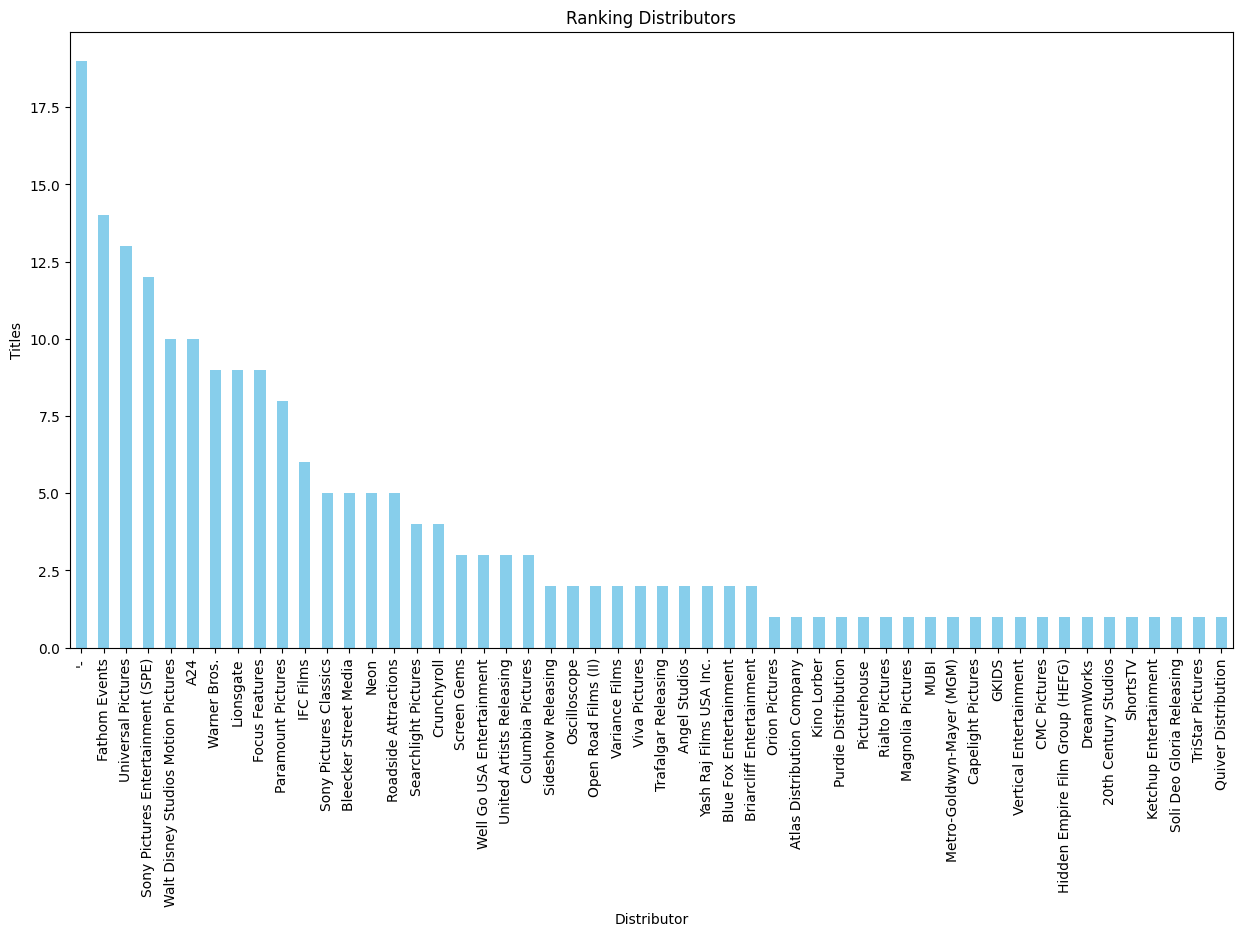

In [5]:

plt.figure(figsize=(15,8))
df['Distributor'].value_counts().plot(kind = 'bar', color= 'skyblue')
plt.xlabel('Distributor')
plt.ylabel('Titles')
plt.title('Ranking Distributors')

In [6]:
df_copy = df.copy()
df_copy.head()

,Rank,Title,Theaters,Total Gross,Release Date,Distributor
0,1,Barbie,"4,337","$594,254,460",2023-07-21 00:00:00,Warner Bros.
1,2,The Super Mario Bros. Movie,"4,371","$574,759,600",2023-04-05 00:00:00,Universal Pictures
2,3,Spider-Man: Across the Spider-Verse,"4,332","$381,178,195",2023-06-02 00:00:00,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,"4,450","$358,995,815",2023-05-05 00:00:00,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,"3,761","$300,144,670",2023-07-21 00:00:00,Universal Pictures


In [7]:
df_copy['Total Gross'] = df_copy['Total Gross'].str.replace('[\$,]', '', regex=True).astype(float)
df_copy

,Rank,Title,Theaters,Total Gross,Release Date,Distributor
0,1,Barbie,"4,337",594254460.0,2023-07-21 00:00:00,Warner Bros.
1,2,The Super Mario Bros. Movie,"4,371",574759600.0,2023-04-05 00:00:00,Universal Pictures
2,3,Spider-Man: Across the Spider-Verse,"4,332",381178195.0,2023-06-02 00:00:00,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,"4,450",358995815.0,2023-05-05 00:00:00,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,"3,761",300144670.0,2023-07-21 00:00:00,Universal Pictures
...,...,...,...,...,...,...
195,196,Contempt4k Restoration - 60th Anniversary,8,173816.0,2023-06-30 00:00:00,Rialto Pictures
196,197,The Wrath of Becky,274,168109.0,2023-05-26 00:00:00,Quiver Distribution
197,198,The Starling Girl,114,161290.0,2023-05-12 00:00:00,Bleecker Street Media
198,199,¡Que viva México!,90,161222.0,2023-03-24 00:00:00,Sony Pictures Entertainment (SPE)


Text(0.5, 1.0, 'Top 10 distributor with the highest revenue')

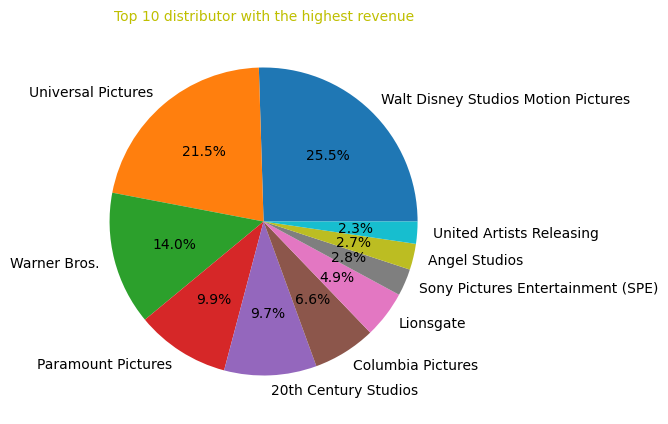

In [11]:
top_distributor = df_copy.groupby('Distributor')['Total Gross'].sum().nlargest(10).reset_index()

sorted_top_distributor = top_distributor.sort_values(by='Total Gross', ascending=False)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.pie(sorted_top_distributor['Total Gross'], labels = sorted_top_distributor['Distributor'], autopct='%.1f%%')
ax1.set_title("Top 10 distributor with the highest revenue", fontsize=10, color="y")

In [14]:
df_copy['Release Date'] = pd.to_datetime(df_copy['Release Date'])

df_copy['Release Date'] = df_copy['Release Date'].dt.strftime('%d/%m/%Y')
df_copy

,Rank,Title,Theaters,Total Gross,Release Date,Distributor
0,1,Barbie,"4,337",594254460.0,21/07/2023,Warner Bros.
1,2,The Super Mario Bros. Movie,"4,371",574759600.0,05/04/2023,Universal Pictures
2,3,Spider-Man: Across the Spider-Verse,"4,332",381178195.0,02/06/2023,Columbia Pictures
3,4,Guardians of the Galaxy Vol. 3,"4,450",358995815.0,05/05/2023,Walt Disney Studios Motion Pictures
4,5,Oppenheimer,"3,761",300144670.0,21/07/2023,Universal Pictures
...,...,...,...,...,...,...
195,196,Contempt4k Restoration - 60th Anniversary,8,173816.0,30/06/2023,Rialto Pictures
196,197,The Wrath of Becky,274,168109.0,26/05/2023,Quiver Distribution
197,198,The Starling Girl,114,161290.0,12/05/2023,Bleecker Street Media
198,199,¡Que viva México!,90,161222.0,24/03/2023,Sony Pictures Entertainment (SPE)


In [17]:
print(top_distributor)

                           Distributor   Total Gross
0  Walt Disney Studios Motion Pictures  1.798080e+09
1                   Universal Pictures  1.517804e+09
2                         Warner Bros.  9.875786e+08
3                   Paramount Pictures  6.963171e+08
4                 20th Century Studios  6.840758e+08
5                    Columbia Pictures  4.659578e+08
6                            Lionsgate  3.481745e+08
7    Sony Pictures Entertainment (SPE)  1.998531e+08
8                        Angel Studios  1.926717e+08
9             United Artists Releasing  1.639156e+08


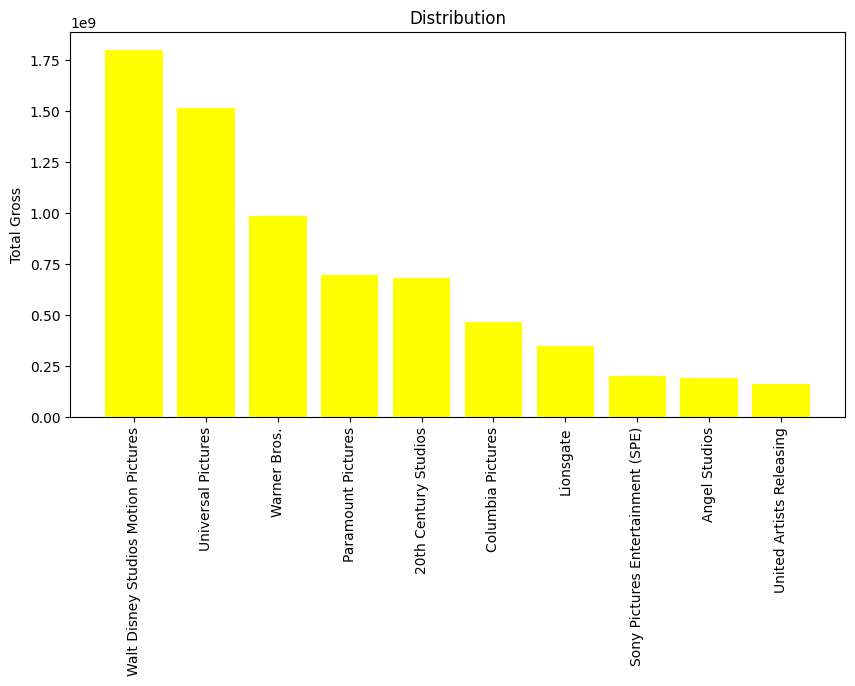

In [28]:
plt.figure(figsize=(10, 5))

plt.bar(top_distributor['Distributor'], top_distributor['Total Gross'], color='yellow')

plt.ylabel('Total Gross')
plt.title('Distribution')

plt.xticks(rotation=90)
plt.show()